<a href="https://colab.research.google.com/github/crzysab/Projek-DQLab/blob/main/Data_Analyst_Project_Business_Decision_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Read Data

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

In [ ]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


## Data Cleansing

In [ ]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


In [ ]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25


### Churn Customers

In [ ]:
# Pengecekan transaksaksi terakhir dalam dataset
max(df['Last_Transaction'])

Timestamp('2019-02-01 23:57:57.286000013')

In [ ]:
# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction']<='2018-12-01', 'is_churn'] = True 
df.loc[df['Last_Transaction']>'2018-12-01', 'is_churn'] = False 

In [ ]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,True
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,True


## Deleting unused columns

In [ ]:
df.drop(['no', 'Row_Num'], axis=1, inplace=True)

In [ ]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,True
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,True


## Visualization

### Customer acquisition by year

In [ ]:
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year_CI = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()

In [ ]:
df_year_CI.head()

Year_First_Transaction
2013     1007
2014     4954
2015    11235
2016    17656
2017    31828
Name: Customer_ID, dtype: int64

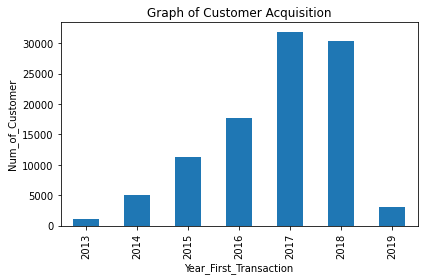

In [ ]:
df_year_CI.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Transaction by year

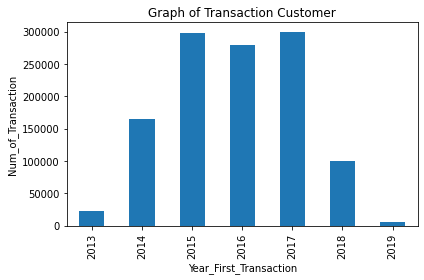

In [ ]:
plt.clf()
#pengelompokan jumlah transaksi berdasarkan tahun awal
df_year_CT = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year_CT.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

### Average transaction amount by year

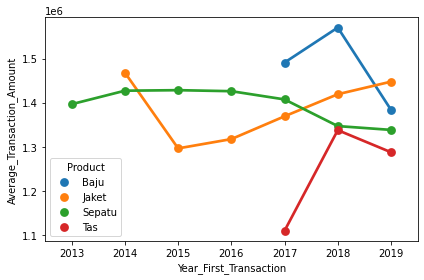

In [ ]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

### The proportion of churned customers for each product

In [ ]:
plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)

<Figure size 432x288 with 0 Axes>

In [ ]:
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

In [ ]:
plot_product

Index(['Tas', 'Sepatu', 'Jaket', 'Baju'], dtype='object', name='Product')

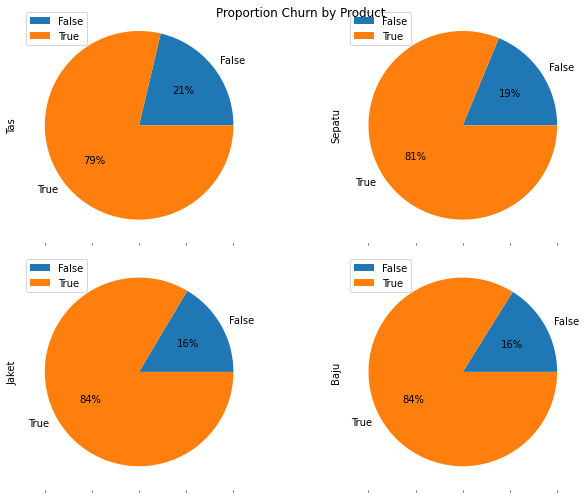

In [ ]:
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

### Distribution of categorization of count transactions

In [ ]:
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2-3'
    elif (row['Count_Transaction']>3 and row['Count_Transaction']<=6):
        val ='4-6'
    elif (row['Count_Transaction']>6 and row['Count_Transaction']<=10):
        val ='7-10'
    else:
        val ='>10'
    return val

In [ ]:
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

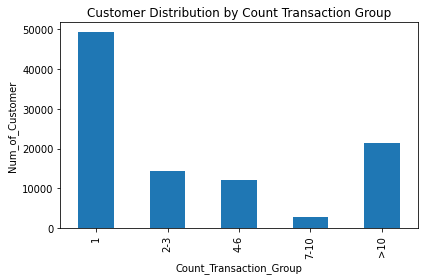

In [ ]:
plt.clf()
df_year_CTG = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year_CTG.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Distribution of categorization of average transaction amount

In [ ]:
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
        val ='100.000 - 250.000'
    elif (row['Average_Transaction_Amount']>250000 and row['Average_Transaction_Amount']<=500000):
        val ='>250.000 - 500.000'
    elif (row['Average_Transaction_Amount']>500000 and row['Average_Transaction_Amount']<=750000):
        val ='>500.000 - 750.000'
    elif (row['Average_Transaction_Amount']>750000 and row['Average_Transaction_Amount']<=1000000):
        val ='>750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount']>1000000 and row['Average_Transaction_Amount']<=2500000):
        val ='>1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount']>2500000 and row['Average_Transaction_Amount']<=5000000):
        val ='>2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount']>5000000 and row['Average_Transaction_Amount']<=10000000):
        val ='>5.000.000 - 10.000.000'
    else:
        val ='>10.000.000'
    return val

In [ ]:
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

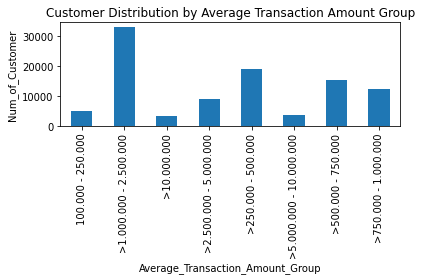

In [ ]:
df_year_AVGT = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year_AVGT.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

## Machine Learning

### Feature Columns and Target

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Customer_ID                       100000 non-null  int64         
 1   Product                           100000 non-null  object        
 2   First_Transaction                 100000 non-null  datetime64[ns]
 3   Last_Transaction                  100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount        100000 non-null  int64         
 5   Count_Transaction                 100000 non-null  int64         
 6   is_churn                          100000 non-null  object        
 7   Year_First_Transaction            100000 non-null  int64         
 8   Year_Last_Transaction             100000 non-null  int64         
 9   Count_Transaction_Group           100000 non-null  object        
 10  Average_Transaction_Amount_Group 

In [ ]:
df = df.astype({'is_churn': bool})

In [ ]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn'] 

### Split X and y into training and testing sections

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Train, predict and evaluate

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred=logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  4520]
 [    3 20476]]


### Confusion Matrix Visualization

<Figure size 432x288 with 0 Axes>

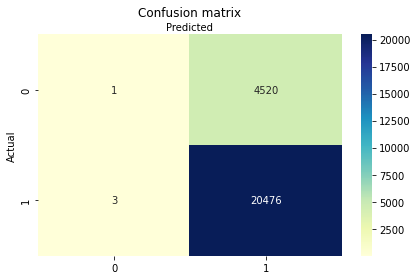

In [ ]:
plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

### Accuracy, Precision, and Recall

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test,y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.81908
Precision: 0.81908
Recall   : 0.81908
